In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint
import seaborn as sns
from datetime import date

In [2]:
# Import API key
from config import weather_api_key

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [6]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
############### CHANGE SIZE TO 1500 WHEN DONE#######################
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#pprint(cities)

640

# Perform API Calls

In [7]:
lat = []
lon = []
temp = []
wind_speed = []
max_temp = []
humidity = []
clouds = []
country = []
city_dt = []
name = []
id =[]
actual_city=[]
today = date.today()
date = today.strftime("%b-%d-%Y") 

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = cities
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [9]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).
# IT IS GETTING INTERUPTED AT CITY 6: 
# {'cod': '404' , 'message' : 'city not found'}
####PRINT OUT LOG OF CURRENT CITY AND ID AS YOU GO##############
for each_city in city:
    response = requests.get(query_url + each_city).json()
    #pprint(response)
    try:
        city_dt.append(response["dt"])
        id.append(response["id"])
        name.append(response["name"])
        temp.append(response['main']['temp'])
        lat.append(response["coord"]["lat"])
        lon.append(response['coord']['lon'])
        wind_speed.append(response["wind"]["speed"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        actual_city.append(each_city)
        print(f"The city {response['name']} was found with the ID of {response['id']}, appending stats.")
    except KeyError: 
        print("Sorry, that city was not found.")
        pass

The city Tiznit Province was found with the ID of 2527087, appending stats.
Sorry, that city was not found.
The city Martapura was found with the ID of 1636022, appending stats.
The city Nuevitas was found with the ID of 3545841, appending stats.
The city Hofn was found with the ID of 2630299, appending stats.
The city Necochea was found with the ID of 3430443, appending stats.
The city Hailun was found with the ID of 2037069, appending stats.
Sorry, that city was not found.
The city Yellowknife was found with the ID of 6185377, appending stats.
The city Mataura was found with the ID of 6201424, appending stats.
The city Hobart was found with the ID of 2163355, appending stats.
The city Jamestown was found with the ID of 5122534, appending stats.
The city Seymchan was found with the ID of 2121373, appending stats.
The city Kaeo was found with the ID of 2189343, appending stats.
The city Saint-Philippe was found with the ID of 935215, appending stats.
The city Tasiilaq was found with th

# Convert Raw Data to DF

In [10]:
#Create a DF and display the DataFrame

In [11]:
all_df = pd.DataFrame({"City": actual_city, 
                       "Lat" : lat,
                       "Lng" : lon,
                       "Max Temp" : max_temp,
                       "Humidity": humidity, 
                       "Cloudiness" : clouds, 
                       "Wind Speed" : wind_speed, 
                       "Country" : country, 
                       "Date" : city_dt  
                      })
all_df["Date"] = pd.to_datetime(all_df["Date"], unit ='s')
all_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiznit,29.5833,-9.5000,63.48,52,22,8.86,MA,2021-04-23 18:58:51
1,martapura,-3.4167,114.8500,73.40,100,27,1.14,ID,2021-04-23 18:58:52
2,nuevitas,21.5453,-77.2644,89.60,37,40,13.80,CU,2021-04-23 18:58:52
3,hofn,64.2539,-15.2082,46.40,76,90,1.59,IS,2021-04-23 18:57:50
4,necochea,-38.5473,-58.7368,66.00,88,100,1.99,AR,2021-04-23 18:58:52


In [12]:
#Do a summary table
all_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,19.887584,20.821501,61.073492,68.345763,53.706780,8.374085
std,33.149012,89.450870,20.498754,22.475169,39.547403,5.531597
min,-54.800000,-175.200000,-13.310000,7.000000,0.000000,0.540000
25%,-8.001025,-60.121050,47.662500,54.000000,13.000000,4.275000
50%,23.266450,26.185400,63.840000,74.000000,56.500000,7.520000
75%,47.354175,100.004925,78.662500,86.000000,98.000000,11.372500
max,78.218600,179.316700,105.800000,100.000000,100.000000,35.210000


In [13]:
#Export the city data into a .csv.
all_df.to_csv("../output_data/cities.csv", encoding="utf-8", index=False, header=True)

# Inspect Data and Remove Cities Where Humidity is > 100%

In [14]:
# Skip this step if no cities are > 100% humidity 
# Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Int64Index([], dtype='int64')
all_df.drop(all_df.loc[all_df["Humidity"] >=100].index,inplace=True)
all_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiznit,29.5833,-9.5000,63.48,52,22,8.86,MA,2021-04-23 18:58:51
2,nuevitas,21.5453,-77.2644,89.60,37,40,13.80,CU,2021-04-23 18:58:52
3,hofn,64.2539,-15.2082,46.40,76,90,1.59,IS,2021-04-23 18:57:50
4,necochea,-38.5473,-58.7368,66.00,88,100,1.99,AR,2021-04-23 18:58:52
5,hailun,47.4500,126.9333,40.60,37,100,12.80,CN,2021-04-23 18:58:53


# Plot The Data

In [15]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

# Latitude vs. Max Temp Plot

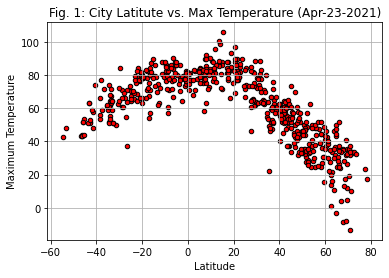

In [16]:
all_df.plot(kind = "scatter", x = "Lat", y = "Max Temp", marker="o", c="red", edgecolors="black")
plt.title(f"Fig. 1: City Latitute vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.grid()
plt.savefig("../output_data/Fig1_city_lat_maxtemp.png")
plt.show()

##### This scatterplot shows that latitudes closer to zero tend to have higher max temperatures, and that there is a parallel max temperature for negative and positive latitudes. 

# Latitude vs. Humidity Plot

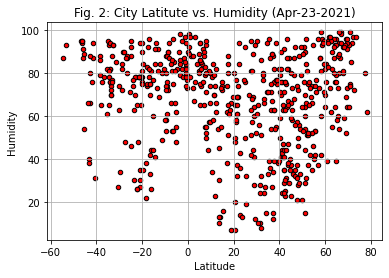

In [17]:
all_df.plot(kind = "scatter", x = "Lat", y = "Humidity", marker="o", c="red", edgecolors="black")
plt.title(f"Fig. 2: City Latitute vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("../output_data/Fig2_city_lat_humidity.png")
plt.show()

##### This scatterplot shows that absolute humidity is high at a wide range of latitudes.

# Latitude vs. Cloudiness Plot

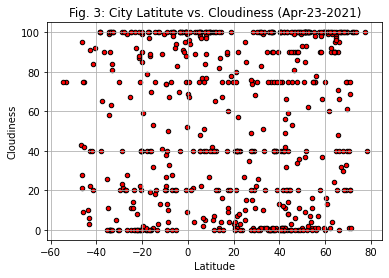

In [18]:
all_df.plot(kind = "scatter", x = "Lat", y = "Cloudiness", marker="o", c="red", edgecolors="black")
plt.title(f"Fig. 3: City Latitute vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("../output_data/Fig3_city_lat_cloudiness.png")
plt.show()

##### This scatterplot shows that cloudiness is fairly equally distributed across latitude - for example it appears that cloudiness at 40 degrees  latitude is almost as often 0 and 100 on the scale of cloudiness. 

# Latitude vs. Wind Speed Plot

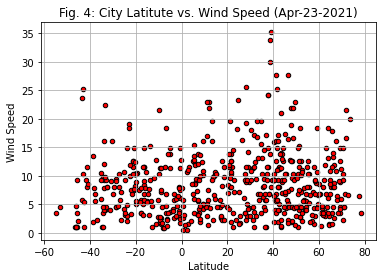

In [19]:
all_df.plot(kind = "scatter", x = "Lat", y = "Wind Speed", marker="o", c="red", edgecolors="black")
plt.title(f"Fig. 4: City Latitute vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("../output_data/Fig4_city_lat_windspeed.png")
plt.show()

##### This scatterplot shows that wind speed does not appear to correlate with latitude - there are remarkable similar wind speeds across a wide range of latitudes. 

# Linear Regression

In [21]:
#create 2 new DFs
NH_df = all_df.loc[(all_df["Lat"] >0) ]
#NH_df.describe()
SH_df = all_df.loc[(all_df["Lat"] <0) ]
SH_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,-21.009013,29.970885,70.590994,73.950276,51.779006,7.437459
std,13.455773,93.817560,11.841528,18.205090,39.344854,4.736691
min,-54.800000,-159.775000,37.400000,22.000000,0.000000,0.810000
25%,-32.716700,-54.333300,63.010000,66.000000,13.000000,3.580000
50%,-20.233300,24.731400,72.430000,78.000000,42.000000,6.910000
75%,-9.433300,125.409200,79.610000,87.000000,94.000000,10.360000
max,-0.358200,175.515300,90.050000,98.000000,100.000000,25.210000


# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.87


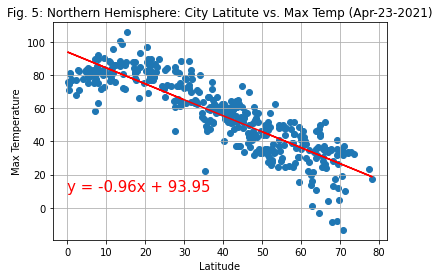

In [22]:
lat_NH = NH_df.iloc[:,1]
max_temp_NH = NH_df.iloc[:,3]
correlation = st.pearsonr(lat_NH, max_temp_NH)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_NH, y_values = max_temp_NH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_NH, max_temp_NH)
regress_values = lat_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_NH, max_temp_NH)
plt.plot(lat_NH,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"Fig. 5: Northern Hemisphere: City Latitute vs. Max Temp ({date})")
plt.grid()
plt.savefig("../output_data/Fig5_city_lat_temp_LR_NH.png")
plt.show()

###### In the Northern Hemisphere, as latitude increases, max temperature decreases.  There is a strong, negative relationship between increasing latitude and increasing temperature.

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.74


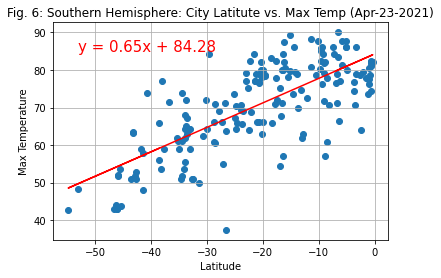

In [23]:
lat_SH = SH_df.iloc[:,1]
max_temp_SH = SH_df.iloc[:,3]
correlation = st.pearsonr(lat_SH, max_temp_SH)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_SH, y_values = max_temp_SH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_SH, max_temp_SH)
regress_values = lat_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_SH, max_temp_SH)
plt.plot(lat_SH,regress_values,"r-")
plt.annotate(line_eq,(-53,85),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"Fig. 6: Southern Hemisphere: City Latitute vs. Max Temp ({date})")
plt.grid()
plt.savefig("../output_data/Fig6_city_lat_temp_LR_SH.png")
plt.show()

##### In the Southern Hemisphere, as latitude increases, max temperature also increases.  There is a strong, positive relationship between increasing latitude and increasing temperature.

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.12


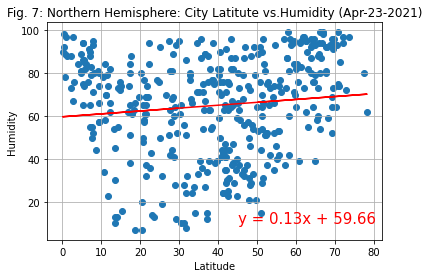

In [24]:
lat_NH = NH_df.iloc[:,1]
humidity_NH = NH_df.iloc[:,4]
correlation = st.pearsonr(lat_NH, humidity_NH)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_NH, y_values = humidity_NH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_NH, humidity_NH)
regress_values = lat_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_NH, humidity_NH)
plt.plot(lat_NH,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Fig. 7: Northern Hemisphere: City Latitute vs.Humidity ({date})")
plt.grid()
plt.savefig("../output_data/Fig7_city_lat_humid_LR_NH.png")
plt.show()

##### In the Northern Hemisphere, there is a weak, positive relationship between latitude and humidity that borders on no relationship.

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.01


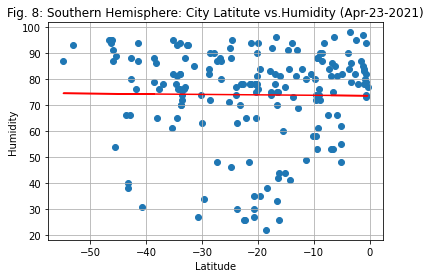

In [25]:
lat_SH = SH_df.iloc[:,1]
humidity_SH = SH_df.iloc[:,4]
correlation = st.pearsonr(lat_SH, humidity_SH)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_SH, y_values = humidity_SH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_SH, humidity_SH)
regress_values = lat_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_SH, humidity_SH)
plt.plot(lat_SH,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Fig. 8: Southern Hemisphere: City Latitute vs.Humidity ({date})")
plt.grid()
plt.savefig("../output_data/Fig8_city_lat_humid_LR_SH.png")
plt.show()

##### In the Southern Hemisphere, there is no relationship between latitude and humidity.   In other words: it is humid down there, pretty much wherever you go.  However, how it feels may be quite different. 

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.1


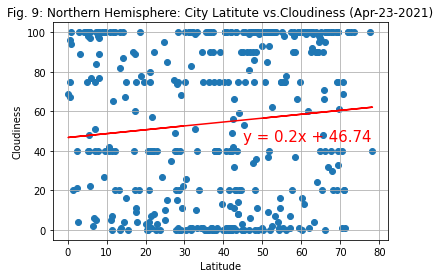

In [26]:
lat_NH = NH_df.iloc[:,1]
cloud_NH = NH_df.iloc[:,5]
correlation = st.pearsonr(lat_NH, cloud_NH)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_NH, y_values = cloud_NH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_NH, cloud_NH)
regress_values = lat_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_NH, cloud_NH)
plt.plot(lat_NH,regress_values,"r-")
plt.annotate(line_eq,(45,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Fig. 9: Northern Hemisphere: City Latitute vs.Cloudiness ({date})")
plt.grid()
plt.savefig("../output_data/Fig9_city_lat_clouds_LR_NH.png")
plt.show()

##### In the Northern Hemisphere, there is no weak positive relationship between cloudiness and latitude.    

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.13


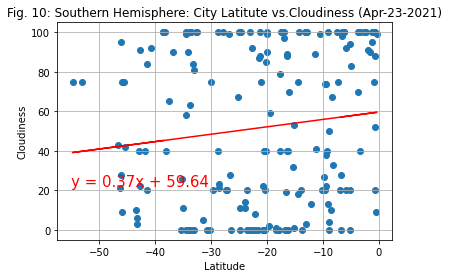

In [28]:
lat_SH = SH_df.iloc[:,1]
cloud_SH = SH_df.iloc[:,5]
correlation = st.pearsonr(lat_SH, cloud_SH)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_SH, y_values = cloud_SH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_SH, cloud_SH)
regress_values = lat_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_SH, cloud_SH)
plt.plot(lat_SH,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Fig. 10: Southern Hemisphere: City Latitute vs.Cloudiness ({date})")
plt.grid()
plt.savefig("../output_data/Fig10_city_lat_clouds_LR_SH.png")
plt.show()

##### In the Southern Hemisphere, there is no meaningful relationship between cloudiness and latitude.    

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.0


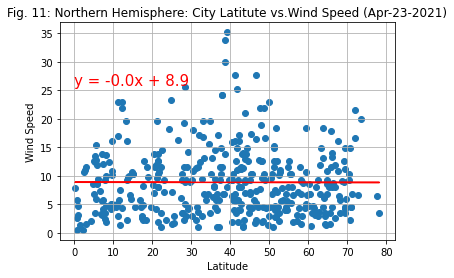

In [29]:
lat_NH = NH_df.iloc[:,1]
wind_NH = NH_df.iloc[:,6]
correlation = st.pearsonr(lat_NH, wind_NH)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_NH, y_values = wind_NH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_NH, wind_NH)
regress_values = lat_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_NH, wind_NH)
plt.plot(lat_NH,regress_values,"r-")
plt.annotate(line_eq,(0,26),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Fig. 11: Northern Hemisphere: City Latitute vs.Wind Speed ({date})")
plt.grid()
plt.savefig("../output_data/Fig11_city_lat_wind_LR_NH.png")
plt.show()

##### In the Northern Hemisphere, there is no meaningful relationship between wind speed and latitude.    

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.04


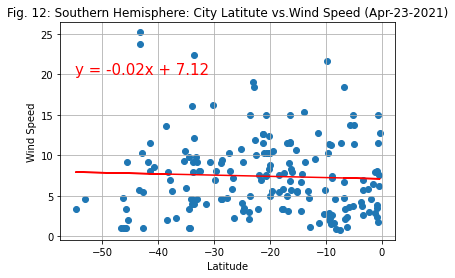

In [30]:
lat_SH = SH_df.iloc[:,1]
wind_SH = SH_df.iloc[:,6]
correlation = st.pearsonr(lat_SH, wind_SH)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_SH, y_values = wind_SH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_SH, wind_SH)
regress_values = lat_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_SH, wind_SH)
plt.plot(lat_SH,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Fig. 12: Southern Hemisphere: City Latitute vs.Wind Speed ({date})")
plt.grid()
plt.savefig("../output_data/Fig12_city_lat_wind_LR_SH.png")
plt.show()

##### In the Southern Hemisphere, there is no meaningful relationship between wind speed and latitude.    